In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt 

def rosenbrock_v(x):
    """Returns the value of Rosenbrock's function at x"""
    return (1 - x[0])**2 + 100*(x[1]- x[0]**2)**2



def rosenbrock_hessian(x):
    #TODO: compute the value, gradient and Hessian of Rosenbrock's function'
        val = rosenbrock_v(x)
        dVdX= np.array([2*(200*x[0]**3 - 200*x[0]*x[1] + x[0]-1),200*(x[1]-x[0]**2)])
        H = np.array([[1200*x[0]**2-400*x[1] + 2,-400*x[0]],
                      [-400*x[0],200]])
        return [val,dVdX, H]

def back_track_multi(function,alpha,beta,start_x):
    t =1
    direction =np.sign(-function(start_x)[1]) #np.sign(- grad_fun_multi(start_x))
    while function(start_x + t*direction)[0]> function(start_x)[0]+ alpha*t*function(start_x)[1].dot(direction):
        t = beta*t
        #print(f" Wartość funkcji {fun_multi(start_x + t*direction)} t-value = {t},dir = {direction}")
    return t 

In [15]:
def exact_line_search(f,x_start,direc_len,alpha = 1e-2):
    t = 1
    direc_len = direc_len*alpha
    x_start = x_start + direc_len
    x_step_forward = x_start + direc_len
    while f(x_step_forward)[0]<f(x_start)[0]:
        x_start = x_step_forward
        x_step_forward = x_start + direc_len
        t += 1
    return alpha*t

In [29]:
def cg(f,initial_x,eps = 1e-2,max_iteration = 1000,stopper = 1):
    if eps <= 0:
        raise ValueError("Epsilon must be positive")
    
    values = []
    runtimes  = []
    
    start_time = time.time()
    i = 0
    x = initial_x
    grad = f(x)[1]
    p_0 = -grad
    while True:
        
        values.append(x)
        runtimes.append( time.time() - start_time )
        
        t = back_track_multi(f,0.25,0.5,x)
        x = x+ t*p_0*stopper
        
        print(f"Im in {i} iteration with step value {t} x-coordination {x}")
        
        grad_up = f(x)[1]
        beta = (grad_up.T @ grad_up) / (grad.T @ grad)
        
        print(f"moja beta {beta}")
        print(f"moj stop condition {p_0@p_0}")
        
        if i % 2 == 0 : 
            beta = 0 
            
        
        p_0 = -grad_up + beta*p_0
        
        #start_x = x_up
        
        i += 1
        
        
        if (grad @ grad < eps**2 or i > max_iteration or t < eps):
            break 
        grad = grad_up
    
    Theta = x
    
    return Theta, values, runtimes ,i
         

In [7]:
def boyd_v(x):
        a=np.array([1,3])
        b=np.array([1,-3])
        c=np.array([-1,0])
        x=np.array(x)
        value = np.exp(a@x-0.1)+np.exp(b@x-0.1)+np.exp(c@x)
        return value

def boyd_example_func(x):
    a=np.array([1,3])
    b=np.array([1,-3])
    c=np.array([-1,0])
    x=np.array(x)
    value = np.exp(a@x-0.1)+np.exp(b@x-0.1)+np.exp(c@x-0.1)
    gradient = a.T*np.exp(a@x-0.1)+b.T*np.exp(b@x-0.1)+c.T*np.exp(c@x-0.1)
    hessian = np.array([[np.exp(a@x)+np.exp(b@x)+np.exp(c@x),3*(np.exp(6*x[1])-1)*np.exp(x[0]-3*x[1])],
          [3*(np.exp(6*x[1])-1)*np.exp(x[0]-3*x[1]),9*(np.exp(6*x[1])+1)*np.exp(x[0]-3*x[1])]])
    return [value, gradient, hessian]

Im in 0 iteration with step value 0.5 x-coordination [-23.59601723 -72.91998902]
moja beta 2.6939780478356034e+170
moj stop condition 24276.51535779079
Im in 1 iteration with step value 0.5 x-coordination [-2.59517728e+84  7.78553184e+84]
moja beta nan
moj stop condition 2.6939780478356034e+170
Im in 2 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 3 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 4 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 5 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 6 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 7 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 8 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 9 iteration 

/Users/czoppson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
/Users/czoppson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in add
  from ipykernel import kernelapp as app
/Users/czoppson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/Users/czoppson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars



moja beta nan
moj stop condition nan
Im in 116 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 117 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 118 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 119 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 120 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 121 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 122 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 123 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 124 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 125 iteration with step value 1 x-coordination [nan nan]

Im in 240 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 241 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 242 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 243 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 244 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 245 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 246 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 247 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 248 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 249 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan


Im in 338 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 339 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 340 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 341 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 342 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 343 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 344 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 345 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 346 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 347 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan


moja beta nan
moj stop condition nan
Im in 469 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 470 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 471 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 472 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 473 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 474 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 475 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 476 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 477 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 478 iteration with step value 1 x-coordination [nan nan]


Im in 658 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 659 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 660 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 661 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 662 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 663 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 664 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 665 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 666 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 667 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan


Im in 791 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 792 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 793 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 794 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 795 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 796 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 797 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 798 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 799 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 800 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan


Im in 925 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 926 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 927 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 928 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 929 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 930 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 931 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 932 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 933 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan
Im in 934 iteration with step value 1 x-coordination [nan nan]
moja beta nan
moj stop condition nan


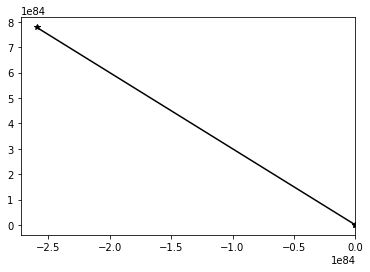

In [30]:
#cg(boyd_example_func,[1,1])

Xopt, Xhist,step_time,fun_evals = cg(boyd_example_func,[1,1])


Xhist_ = np.array([[x[0], x[1]] for x in Xhist])



MX,MY = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
Z = np.array([MX,MY]).reshape(2,-1)
VR = boyd_v(Z)
plt.contour(MX,MY,VR.reshape(MX.shape), 100)
plt.plot(Xhist_[:,0], Xhist_[:,1], '*-k')

In [13]:
def cg2(f,initial_x,eps = 1e-2,max_iteration = 1000,stopper = 1e-2):
    if eps <= 0:
        raise ValueError("Epsilon must be positive")
    
    values = []
    runtimes  = []
    
    start_time = time.time()
    i = 0
    start_x = initial_x
    p_0 = -f(start_x)[1]
    grad = p_0
    while True:
        
        values.append(start_x)
        runtimes.append( time.time() - start_time )
        
        t = exact_line_search(f,start_x,p_0,alpha = 1e-2)
        x_up = start_x + t*p_0
        
        print(f"Im in {i} iteration with step value {t} x-coordination {start_x}")
        
        grad_up = f(x_up)[1]
        beta = (grad_up @ grad_up) / (grad @ grad)
        
        print(f"moja beta {beta}")
        print(f"moj stop condition {p_0@p_0}")
        
        if i % 2 == 0 : 
            beta = 0 
            
        
        p_up = -grad_up + beta*p_0
        
        p_0 = p_up
        start_x = x_up
        
        i += 1
        
        
        if (grad @ grad < eps or i > max_iteration or t < eps):
            break 
            
        grad = grad_up
    
    Theta = start_x
    
    return Theta, values, runtimes ,i

Im in 0 iteration with step value 0.01 x-coordination [1, 1]
moja beta 0.014713564160742154
moj stop condition 24276.51535779079
Im in 1 iteration with step value 0.03 x-coordination [ 0.50807966 -0.47839978]
moja beta 0.014772579287769332
moj stop condition 357.19406631609706
Im in 2 iteration with step value 0.16 x-coordination [0.32415386 0.05792658]
moja beta 0.8355234565651783
moj stop condition 5.003676916814707
Im in 3 iteration with step value 0.07 x-coordination [ 0.00788905 -0.10961655]
moja beta 0.14116741855751694
moj stop condition 4.408787962488839
Im in 4 iteration with step value 0.32 x-coordination [-0.06391686  0.01862919]
moja beta 0.022504127574388848
moj stop condition 0.77601024612192
Im in 5 iteration with step value 0.09 x-coordination [-0.34568529  0.01026235]
moja beta 0.001596100661948817
moj stop condition 0.01400605625997554
Im in 6 iteration with step value 0.1 x-coordination [-0.34594453 -0.00038574]
moja beta 0.0734976311869615
moj stop condition 2.07266

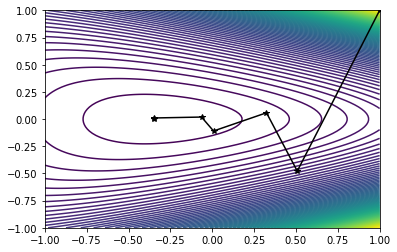

In [16]:
Xopt, Xhist,step_time,fun_evals = cg2(boyd_example_func,[1,1])


Xhist_ = np.array([[x[0], x[1]] for x in Xhist])



MX,MY = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
Z = np.array([MX,MY]).reshape(2,-1)
VR = boyd_v(Z)
plt.contour(MX,MY,VR.reshape(MX.shape), 100)
plt.plot(Xhist_[:,0], Xhist_[:,1], '*-k')